# Proyecto de analis de datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder



In [4]:
# df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
# df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

df_train = pd.read_csv('D:/Shadow/GitHub/DataScience/MisionUno/Titanic/train.csv')
df_test = pd.read_csv('D:/Shadow/GitHub/DataScience/MisionUno/Titanic/test.csv')


In [3]:
# Cargar los datos sintéticos
# Puedes subir el archivo desde tu máquina local a Google Colab usando la función de carga de archivos
from google.colab import files
uploaded = files.upload()

# Suponiendo que el archivo subido es 'datos_carnaval_sinteticos.csv'
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

ModuleNotFoundError: No module named 'google.colab'

In [5]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
285,286,0,3,"Stankovic, Mr. Ivan",male,33.0,0,0,349239,8.6625,NaN,C
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


In [6]:
df_train.shape

(891, 12)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Valores Duplicados

In [8]:
df_train.duplicated().sum()

0

In [14]:
df_train.isnull().sum().sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

# Determinar valores nulos del dataframe

In [11]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [12]:
columnas_categoricas = df_train.select_dtypes(include=['object']).columns

# print(columnas_categoricas)
for column in columnas_categoricas:
    if df_train[column].nunique()<=10:
        print(f"{column}: {df_train[column].unique()}")

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [16]:
columnas_categoricas = df_train.select_dtypes(include=['int64','float64']).columns

for column in columnas_categoricas:
    if df_train[column].nunique()<=10:
        print(f"{column}: {df_train[column].unique()}")

Survived: [0 1]
Pclass: [3 1 2]
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]


# Analis Análisis Exploratorio de Datos (EDA)

<function matplotlib.pyplot.show(close=None, block=None)>

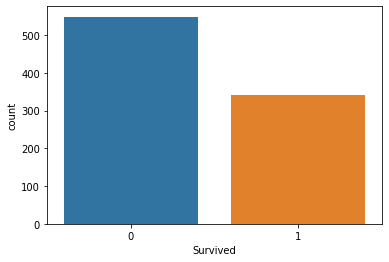

In [12]:
sns.countplot(x='Survived',data=df_train)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

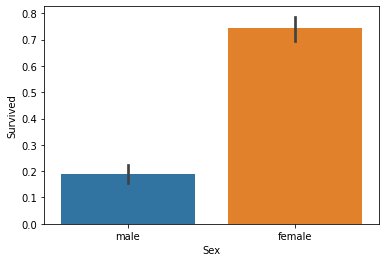

In [13]:
sns.barplot(x='Sex',y='Survived',data = df_train)
plt.show

# conclusion
- Passengerld, Cabin, Fare, ticket, no a la prediccion del modelo, debido a los valores nulos 

In [14]:
df_train=df_train.drop(columns=['Cabin','Fare','Ticket','Name'])
df_test=df_test.drop(columns=['Cabin','Fare','Ticket','Name'])

df_train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


# Separacion de conjunto de datos

In [15]:
X = df_train.drop(['Survived'],axis=1)
Y = df_train['Survived']

## Columnas categoricas a numericas 

In [16]:
s = (X.dtypes=='object')
object_cols=list(s[s].index)

ordinal_encoder=OrdinalEncoder()
X[object_cols]=ordinal_encoder.fit_transform(X[object_cols])

In [17]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,1.0,22.0,1,0,2.0
1,2,1,0.0,38.0,1,0,0.0
2,3,3,0.0,26.0,0,0,2.0
3,4,1,0.0,35.0,1,0,2.0
4,5,3,1.0,35.0,0,0,2.0


# Rellenar valores nulos

In [18]:
imputer = SimpleImputer()
x_transformed = pd.DataFrame(imputer.fit_transform(X))
x_transformed.columns=X.columns


In [19]:
x_transformed.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [20]:
model = RandomForestClassifier()
model.fit(x_transformed,Y)


RandomForestClassifier()

Prediccion

In [21]:
df_test[object_cols]=ordinal_encoder.fit_transform(df_test[object_cols])

df_test_transformed = pd.DataFrame(imputer.transform(df_test))
df_test_transformed.columns=df_test.columns

predictions = model.predict(df_test_transformed)

# Submission

In [22]:
output = pd.DataFrame({'PassengerId':df_test.PassengerId,'survived':predictions})
output.to_csv('submission.csv', index=False)